In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
import keras
import keras as kr
kr.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import sys
print(sys.executable)

C:\Users\user\anaconda3\python.exe


In [11]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf 
import matplotlib.pyplot as plt 
import keras.models
import sklearn.model_selection as sk
from keras.models import Sequential
from keras.models import Model
from keras.layers import InputLayer
from keras.layers import Activation, Flatten,add
from keras.layers import Input,Dense,Dropout,BatchNormalization,Convolution2D,MaxPooling2D,AveragePooling2D,Concatenate,ZeroPadding2D,GlobalAveragePooling2D
from keras.layers import Flatten, Activation, Conv2D
from keras.layers.merge import concatenate
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.models import Model,load_model
from keras import regularizers
from sklearn.model_selection import train_test_split, KFold
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import matplotlib.pyplot as plt
from keras.utils import plot_model,np_utils
import random
from keras.preprocessing.image import ImageDataGenerator
import keras.metrics as metric
from keras.optimizers import SGD
import pydot
import os

train_data='D:\\star\\GoogleNetV4_class_ORI_20191015\\train\\'
vaildation_data='D:\\star\\GoogleNetV4_class_ORI_20191015\\vaildation\\'

#C:\\Users\\star\\GoogleNetV4_sex_20190621\\traindata
#train_data='D:\data\sex\ctrain\\'

In [12]:
# def testdata():    
#     test_imgs=[]
#     for i in tqdm(os.listdir(test_data)):
#         if i[len(i)-1]=='g':
#             #print(i)
#             test_img=cv2.imread(test_data+i, cv2.IMREAD_COLOR)
#             test_imgs=cv2.resize(test_img,(299,299))
#     return test_imgs

In [13]:
# testing_images = testdata()
# te_img_data = np.array([i for i in testing_images]).reshape(-1,299,299,3)
# print(te_img_data)

In [14]:
def imglabel(nimg):
    if (nimg[0]=='A' and nimg[1]=='e') or (nimg[0]=='7' and nimg[1]=='_'):
        return np.array([0,0,0,0,0,0,0,1])
    elif (nimg[0]=='A' and nimg[1]=='l') or (nimg[0]=='0' and nimg[1]=='_'):
        return np.array([0,0,0,0,0,0,1,0])
    elif (nimg[0]=='A' and nimg[1]=='r') or (nimg[0]=='1' and nimg[1]=='_'):
        return np.array([0,0,0,0,0,1,0,0])
    elif (nimg[0] == 'C' and nimg[5] == 't') or (nimg[0]=='4' and nimg[1]=='_'):
        return np.array([0,0,0,0,1,0,0,0])
    elif (nimg[0]=='C' and nimg[5]=='n') or (nimg[0]=='6' and nimg[1]=='_'):
        return np.array([0,0,0,1,0,0,0,0])
    elif (nimg[0]=='C' and nimg[5]=='p' and nimg[4]=='x') or (nimg[0]=='5' and nimg[1]=='_'):
        return np.array([0,0,1,0,0,0,0,0])
    elif (nimg[0]=='C' and nimg[5]=='p' and nimg[4]=='i') or (nimg[0]=='2' and nimg[1]=='_'):
        return np.array([0,1,0,0,0,0,0,0])
    elif (nimg[0] == 'A' and nimg[1] == 'n') or (nimg[0]=='3' and nimg[1]=='_'):
        return np.array([1,0,0,0,0,0,0,0])

In [15]:
def vaildationdata():
    vaildation_imgs=[]
    for i in tqdm(os.listdir(vaildation_data)):
        if i[len(i)-1]=='g':
            #print(i)
            vaoimg=cv2.imread(vaildation_data+i, cv2.IMREAD_COLOR)
            #print(i)
            #height, width, channels = img.shape
            vaimg=cv2.resize(vaoimg,(299,299))
            #neimg = cv2.resize(oimg, (224, 224))
            #b, g, r = cv2.split(img)
            #b = 255 - b
            #g = 255 - g
            #r = 255 - r
            #neimg[:, :, 0] = b
            #neimg[:, :, 1] = g
            #neimg[:, :, 2] = r
            vaildation_imgs.append([np.array(vaimg),imglabel(i)])
            #flip_1 = np.fliplr(img)
            #flip_2 = np.flipud(img)
            #train_imgs.append([np.array(flip_1),imglabel(i)])
            #train_imgs.append([np.array(flip_2),imglabel(i)])
    return vaildation_imgs

In [16]:
vaildation_images = vaildationdata()
va_img_data = np.array([i[0] for i in vaildation_images]).reshape(-1,299,299,3)
va_lbl_data = np.array([i[1] for i in vaildation_images])
print(va_lbl_data.shape)

100%|███████████████████████████████████████████████████████████████████████████████| 912/912 [00:05<00:00, 166.68it/s]


(912, 8)


In [17]:
def traindata():
    train_imgs=[]
    for i in tqdm(os.listdir(train_data)):
        if i[len(i)-1]=='g':
            #print(i)
            oimg=cv2.imread(train_data+i, cv2.IMREAD_COLOR)
            #print(i)
            #height, width, channels = img.shape
            img=cv2.resize(oimg,(299,299))
            #neimg = cv2.resize(oimg, (224, 224))
            #b, g, r = cv2.split(img)
            #b = 255 - b
            #g = 255 - g
            #r = 255 - r
            #neimg[:, :, 0] = b
            #neimg[:, :, 1] = g
            #neimg[:, :, 2] = r
            train_imgs.append([np.array(img),imglabel(i)])
            #flip_1 = np.fliplr(img)
            #flip_2 = np.flipud(img)
            #train_imgs.append([np.array(flip_1),imglabel(i)])
            #train_imgs.append([np.array(flip_2),imglabel(i)])
    return train_imgs

In [18]:
training_images = traindata()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,299,299,3)
tr_lbl_data = np.array([i[1] for i in training_images])
print(tr_lbl_data.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 8207/8207 [00:34<00:00, 240.67it/s]


(8207, 8)


# 建立CNN(googlNet)模型，基於inception_4的模塊

In [19]:
CONV_BLOCK_COUNT = 0  # 用来命名计数卷积编号
INCEPTION_A_COUNT = 0
INCEPTION_B_COUNT = 0
INCEPTION_C_COUNT = 0

In [20]:
def conv_block(x, nb_filters, nb_row, nb_col, strides=(1, 1), padding='same', use_bias=False):
    global CONV_BLOCK_COUNT
    CONV_BLOCK_COUNT += 1
    with K.name_scope('conv_block_'+str(CONV_BLOCK_COUNT)):
        x = Conv2D(filters=nb_filters,
                   kernel_size=(nb_row, nb_col),
                   strides=strides,
                   padding=padding,
                   use_bias=use_bias)(x)
        x = BatchNormalization(axis=-1, momentum=0.9, scale=False)(x)
        x = Activation("relu")(x)
    return x

In [21]:
def stem(x_input):
    with K.name_scope('stem'):
        x = conv_block(x_input, 32, 3, 3, strides=(2, 2), padding='valid')
        x = conv_block(x, 32, 3, 3, padding='valid')
        x = conv_block(x, 64, 3, 3)
 
        x1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
        x2 = conv_block(x, 96, 3, 3, strides=(2, 2), padding='valid')
 
        x = concatenate([x1, x2], axis=-1)
 
        x1 = conv_block(x, 64, 1, 1)
        x1 = conv_block(x1, 96, 3, 3, padding='valid')
 
        x2 = conv_block(x, 64, 1, 1)
        x2 = conv_block(x2, 64, 7, 1)
        x2 = conv_block(x2, 64, 1, 7)
        x2 = conv_block(x2, 96, 3, 3, padding='valid')
 
        x = concatenate([x1, x2], axis=-1)
 
        x1 = conv_block(x, 192, 3, 3, strides=(2, 2), padding='valid')
        x2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
 
        merged_vector = concatenate([x1, x2], axis=-1)
    return merged_vector

In [22]:
def inception_A(x_input):
    """35*35 卷积块"""
    global INCEPTION_A_COUNT
    INCEPTION_A_COUNT += 1
    with K.name_scope('inception_A' + str(INCEPTION_A_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)  # 35 * 35 * 192
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 96, 1, 1)  # 35 * 35 * 96
 
        conv1x1 = conv_block(x_input, 96, 1, 1)  # 35 * 35 * 96
 
        conv1x1_3x3 = conv_block(x_input, 64, 1, 1)  # 35 * 35 * 64
        conv1x1_3x3 = conv_block(conv1x1_3x3, 96, 3, 3)  # 35 * 35 * 96
 
        conv3x3_3x3 = conv_block(x_input, 64, 1, 1)  # 35 * 35 * 64
        conv3x3_3x3 = conv_block(conv3x3_3x3, 96, 3, 3)  # 35 * 35 * 96
        conv3x3_3x3 = conv_block(conv3x3_3x3, 96, 3, 3)  # 35 * 35 * 96
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv1x1_3x3, conv3x3_3x3], axis=-1)  # 35 * 35 * 384
    return merged_vector

In [23]:
def inception_B(x_input):
    """17*17 卷积块"""
    global INCEPTION_B_COUNT
    INCEPTION_B_COUNT += 1
    with K.name_scope('inception_B' + str(INCEPTION_B_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 128, 1, 1)
 
        conv1x1 = conv_block(x_input, 384, 1, 1)
 
        conv1x7_1x7 = conv_block(x_input, 192, 1, 1)
        conv1x7_1x7 = conv_block(conv1x7_1x7, 224, 1, 7)
        conv1x7_1x7 = conv_block(conv1x7_1x7, 256, 1, 7)
 
        conv2_1x7_7x1 = conv_block(x_input, 192, 1, 1)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 192, 1, 7)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 224, 7, 1)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 224, 1, 7)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 256, 7, 1)
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv1x7_1x7, conv2_1x7_7x1], axis=-1)
    return merged_vector

In [24]:
def inception_C(x_input):
    """8*8 卷积块"""
    global INCEPTION_C_COUNT
    INCEPTION_C_COUNT += 1
    with K.name_scope('Inception_C' + str(INCEPTION_C_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 256, 1, 1)
 
        conv1x1 = conv_block(x_input, 256, 1, 1)
 
        # 用 1x3 和 3x1 替代 3x3
        conv3x3_1x1 = conv_block(x_input, 384, 1, 1)
        conv3x3_1 = conv_block(conv3x3_1x1, 256, 1, 3)
        conv3x3_2 = conv_block(conv3x3_1x1, 256, 3, 1)
 
        conv2_3x3_1x1 = conv_block(x_input, 384, 1, 1)
        conv2_3x3_1x1 = conv_block(conv2_3x3_1x1, 448, 1, 3)
        conv2_3x3_1x1 = conv_block(conv2_3x3_1x1, 512, 3, 1)
        conv2_3x3_1x1_1 = conv_block(conv2_3x3_1x1, 256, 3, 1)
        conv2_3x3_1x1_2 = conv_block(conv2_3x3_1x1, 256, 1, 3)
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv3x3_1, conv3x3_2, conv2_3x3_1x1_1, conv2_3x3_1x1_2], axis=-1)
    return merged_vector

In [25]:
def reduction_A(x_input, k=192, l=224, m=256, n=384):
    with K.name_scope('Reduction_A'):
        """Architecture of a 35 * 35 to 17 * 17 Reduction_A block."""
        maxpool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x_input)
 
        conv3x3 = conv_block(x_input, n, 3, 3, strides=(2, 2), padding='valid')
 
        conv2_3x3 = conv_block(x_input, k, 1, 1)
        conv2_3x3 = conv_block(conv2_3x3, l, 3, 3)
        conv2_3x3 = conv_block(conv2_3x3, m, 3, 3, strides=(2, 2), padding='valid')
 
        merged_vector = concatenate([maxpool, conv3x3, conv2_3x3], axis=-1)
    return merged_vector

In [26]:
def reduction_B(x_input):
    """Architecture of a 17 * 17 to 8 * 8 Reduction_B block."""
    with K.name_scope('Reduction_B'):
        maxpool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x_input)
 
        conv3x3 = conv_block(x_input, 192, 1, 1)
        conv3x3 = conv_block(conv3x3, 192, 3, 3, strides=(2, 2), padding='valid')
 
        conv1x7_7x1_3x3 = conv_block(x_input, 256, 1, 1)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 256, 1, 7)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 320, 7, 1)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 320, 3, 3, strides=(2, 2), padding='valid')
 
        merged_vector = concatenate([maxpool, conv3x3, conv1x7_7x1_3x3], axis=-1)
    return merged_vector

In [27]:
def inception_v4_backbone(nb_classes=8, load_weights=True):
    x_input = Input(shape=(299, 299, 3))
    # Stem
    x = stem(x_input)  # 35 x 35 x 384
    # 4 x Inception_A
    for i in range(4):
        x = inception_A(x)  # 35 x 35 x 384
    # Reduction_A
    x = reduction_A(x, k=192, l=224, m=256, n=384)  # 17 x 17 x 1024
    # 7 x Inception_B
    for i in range(7):
        x = inception_B(x)  # 17 x 17 x1024
    # Reduction_B
    x = reduction_B(x)  # 8 x 8 x 1536
    # Average Pooling
    x = AveragePooling2D(pool_size=(8, 8))(x)  # 1536
    # dropout
    x = Dropout(0.2)(x)
    x = Flatten()(x)  # 1536
    # 全连接层
    x = Dense(units=nb_classes, activation='softmax')(x)
    model = Model(inputs=x_input, outputs=x, name='Inception-V4')
    model.save('googlenetV4_classification_ORI_20200224_epoch250_shuffle.h5')    
    return model

# 將model存下來(per Epoch)

In [28]:
from keras.callbacks import ModelCheckpoint
model_path ='D:\\star\\GoogleNetV4_class_ORI_20191015\\model_20200224_epoch250\\'

model_name = "checkpoint-{epoch:02d}e-val_acc_{val_acc:.2f}.hdf5"

checkpoint = ModelCheckpoint(os.path.join(model_path,model_name),
                             monitor='val_acc',verbose=1,save_best_only=False, save_weights_only=False,
                             mode='auto', period=1)

In [29]:
model = inception_v4_backbone()
plot_model(model, 'inceptionv4_classification_ORI_20200224_epoch250_shuffle.png', show_shapes=True)

sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False) #decay：每次更新後，學習速率隨之衰減的比率
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model.summary();
#history = model.fit(x=tr_img_data, y=tr_lbl_data, batch_size=32, epochs=150,verbose=2,shuffle=True,validation_split=0.1)
history = model.fit(x=tr_img_data, y=tr_lbl_data, batch_size=32, epochs=250,verbose=2,shuffle=True,validation_data=(va_img_data,va_lbl_data))
model.save('googlenetV4_classification_ORI_20200224_epoch250_shuffle.h5')

# evaluate the model
loss, acc = model.evaluate(va_img_data, va_lbl_data, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 35, 35, 96)   288         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 35, 35, 96)   288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 35, 35, 96)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 35, 35, 96)   0           batch_normalization_20[0][0]     
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 35, 35, 96)   0           batch_normalization_22[0][0]     
__________

batch_normalization_51 (BatchNo (None, 17, 17, 224)  672         conv2d_51[0][0]                  
__________________________________________________________________________________________________
activation_46 (Activation)      (None, 17, 17, 192)  0           batch_normalization_46[0][0]     
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 17, 17, 224)  0           batch_normalization_51[0][0]     
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 17, 17, 224)  301056      activation_46[0][0]              
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 17, 17, 224)  351232      activation_51[0][0]              
__________________________________________________________________________________________________
batch_norm

batch_normalization_65 (BatchNo (None, 17, 17, 384)  1152        conv2d_65[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 17, 17, 256)  768         conv2d_68[0][0]                  
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, 17, 17, 256)  768         conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 17, 17, 128)  0           batch_normalization_64[0][0]     
__________________________________________________________________________________________________
activation_65 (Activation)      (None, 17, 17, 384)  0           batch_normalization_65[0][0]     
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 17, 17, 192)  196608      concatenate_13[0][0]             
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 17, 17, 224)  301056      activation_100[0][0]             
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, 17, 17, 192)  576         conv2d_96[0][0]                  
__________________________________________________________________________________________________
batch_normalization_101 (BatchN (None, 17, 17, 224)  672         conv2d_101[0][0]                 
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 17, 17, 192)  0           batch_normalization_96[0][0]     
__________

__________________________________________________________________________________________________
average_pooling2d_12 (AveragePo (None, 1, 1, 1536)   0           concatenate_16[0][0]             
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1, 1, 1536)   0           average_pooling2d_12[0][0]       
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 1536)         0           dropout_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 8)            12296       flatten_1[0][0]                  
Total params: 27,517,640
Trainable params: 27,474,056
Non-trainable params: 43,584
__________________________________________________________________________________________________
Train on 8207 samples, val

Epoch 83/250
 - 138s - loss: 0.0100 - acc: 0.9966 - val_loss: 0.1757 - val_acc: 0.9660
Epoch 84/250
 - 138s - loss: 0.0228 - acc: 0.9932 - val_loss: 0.2124 - val_acc: 0.9529
Epoch 85/250
 - 136s - loss: 0.0080 - acc: 0.9971 - val_loss: 0.1624 - val_acc: 0.9616
Epoch 86/250
 - 136s - loss: 0.0095 - acc: 0.9976 - val_loss: 0.1883 - val_acc: 0.9594
Epoch 87/250
 - 136s - loss: 0.0076 - acc: 0.9976 - val_loss: 0.1416 - val_acc: 0.9671
Epoch 88/250
 - 136s - loss: 0.0105 - acc: 0.9962 - val_loss: 0.1516 - val_acc: 0.9649
Epoch 89/250
 - 136s - loss: 0.0150 - acc: 0.9957 - val_loss: 0.1764 - val_acc: 0.9682
Epoch 90/250
 - 136s - loss: 0.0203 - acc: 0.9933 - val_loss: 0.2158 - val_acc: 0.9518
Epoch 91/250
 - 137s - loss: 0.0236 - acc: 0.9916 - val_loss: 0.1569 - val_acc: 0.9561
Epoch 92/250
 - 137s - loss: 0.0078 - acc: 0.9981 - val_loss: 0.1603 - val_acc: 0.9616
Epoch 93/250
 - 136s - loss: 0.0118 - acc: 0.9970 - val_loss: 0.2884 - val_acc: 0.9298
Epoch 94/250
 - 137s - loss: 0.0126 - acc: 

Epoch 176/250
 - 136s - loss: 0.0014 - acc: 0.9996 - val_loss: 0.1495 - val_acc: 0.9704
Epoch 177/250
 - 136s - loss: 5.4406e-04 - acc: 0.9999 - val_loss: 0.1549 - val_acc: 0.9704
Epoch 178/250
 - 136s - loss: 0.0015 - acc: 0.9995 - val_loss: 0.1567 - val_acc: 0.9649
Epoch 179/250
 - 136s - loss: 7.9567e-04 - acc: 0.9999 - val_loss: 0.1670 - val_acc: 0.9682
Epoch 180/250
 - 136s - loss: 0.0020 - acc: 0.9994 - val_loss: 0.1858 - val_acc: 0.9682
Epoch 181/250
 - 136s - loss: 9.5851e-04 - acc: 0.9998 - val_loss: 0.1630 - val_acc: 0.9704
Epoch 182/250
 - 136s - loss: 0.0011 - acc: 0.9995 - val_loss: 0.1730 - val_acc: 0.9638
Epoch 183/250
 - 136s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.1857 - val_acc: 0.9594
Epoch 184/250
 - 136s - loss: 0.0010 - acc: 0.9999 - val_loss: 0.2000 - val_acc: 0.9649
Epoch 185/250
 - 136s - loss: 0.0012 - acc: 0.9998 - val_loss: 0.1912 - val_acc: 0.9682
Epoch 186/250
 - 136s - loss: 0.0026 - acc: 0.9996 - val_loss: 0.1383 - val_acc: 0.9704
Epoch 187/250
 - 136

In [30]:
import os  
  
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  
  
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()    


def show_train_history(history, tr_img_data, te_img_data):  
    plt.plot(history.history[tr_img_data])  
    plt.plot(history.history[te_img_data])  
    plt.title('Train History')  
    plt.ylabel(tr_img_data)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [31]:
#使用函數 show_train_history 顯示 accuracy 在 train 與 evaluation 的差異
#loss 在 train 與 evaluation 的差異
from keras.utils import *  
if isDisplayAvl():  
    show_train_history(history, 'acc', 'val_acc')
    show_train_history(history, 'loss', 'val_loss')

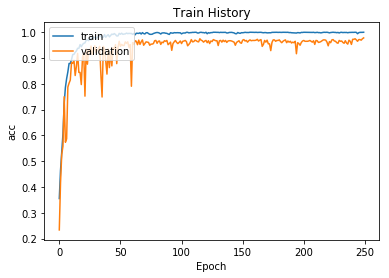

In [32]:
show_train_history(history, 'acc', 'val_acc') 

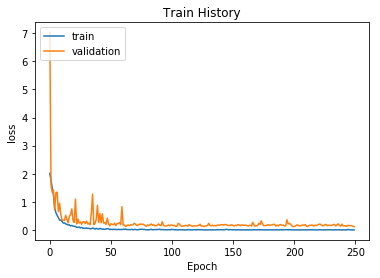

In [33]:
show_train_history(history, 'loss', 'val_loss') 

In [34]:
kfold =KFold(n_splits=5, shuffle=True, random_state=7)
tr_cvscores = []
test_cvscores = []
for ktrain, ktest in kfold.split(tr_img_data, tr_lbl_data):
    #history = model.fit(x=tr_img_data[ktrain], y=tr_lbl_data[ktrain], batch_size=16, epochs=100,verbose=2,validation_split=0.2)
    #model.save(str(times)+'_mosq-res34.h5')
    #times=times+1
    tr_score, tr_acc = model.evaluate(tr_img_data[ktrain],tr_lbl_data[ktrain])
    print('Training score:', tr_score)
    print('Training accuracy:', tr_acc)
    tr_cvscores.append(tr_acc * 100)
    test_score, test_acc = model.evaluate(tr_img_data[ktest],tr_lbl_data[ktest])
    print('Test score:', test_score)
    print('Test accuracy:', test_acc)
    test_cvscores.append(test_acc * 100)
print(tr_cvscores)
print(test_cvscores)

6565/6565 [==============================] - ETA: 35 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 

In [28]:
# def testdata():    
#     test_imgs=[]    
#     for root,dirs,files in os.walk(test_data): #讀取資料夾影像
#         for f in files:
#             img=cv2.imread(os.path.join(root,f))
#             #print(os.path.join(root,f))
#             img=cv2.resize(img,(299,299))
#             img=img.reshape(-1, 299, 299, 3)